# Curve Fitting and overfitting

In [2]:
# We will be using SciPY Python library for mathematics,science and engineering
# https://www.scipy.org/ comes with Anaconda
# Most important external Python library NumPy library underneath: http://www.numpy.org/
# Data from the book
# Building Machine Learning Systems with Python
# by Willi Richert and Luis Pedro Coelho
# published by PACKT Publishing

# It is made available under the MIT License
import scipy as sp
import pandas as pd
import numpy as np

print(f"SciPy version: {sp.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

# date
from datetime import datetime
print(f"Today is {datetime.now()}")
# python version
import sys
print(f"Python version: {sys.version}")

SciPy version: 1.15.3
Pandas version: 2.2.2
NumPy version: 2.0.2
Today is 2025-06-06 06:33:06.938298
Python version: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]


In [3]:
url = "https://raw.githubusercontent.com/ValRCS/RBS_LIFT_AI_ML_Models/refs/heads/main/data/web_traffic.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['date', 'visitors'])
print(f"Shape of the data: {df.shape}")
# now let's get data as a numpy array
data = df.values

Shape of the data: (743, 2)


In [4]:
df.head()

,date,visitors
0,1,2272.0
1,2,NaN
2,3,1386.0
3,4,1365.0
4,5,1488.0


In [5]:
type(data)

numpy.ndarray

In [7]:
data[:12]

array([[1.000e+00, 2.272e+03],
       [2.000e+00,       nan],
       [3.000e+00, 1.386e+03],
       [4.000e+00, 1.365e+03],
       [5.000e+00, 1.488e+03],
       [6.000e+00, 1.337e+03],
       [7.000e+00, 1.883e+03],
       [8.000e+00, 2.283e+03],
       [9.000e+00, 1.335e+03],
       [1.000e+01, 1.025e+03],
       [1.100e+01, 1.139e+03],
       [1.200e+01, 1.477e+03]])

In [ ]:
# what is our data structure like
data.shape

(743, 2)

In [12]:
# We need to clean and preprocess our data a bit:
# split is with index notation (comes from NumPy)
x = data[:, 0] # we grab everything from first dimension(rows) and only the first(0th) column
y = data[:,1]
# alternatively I could have gotten x and y from df directly
x_also = df.date.values
y_also = df.visitors.values
# assert they are same
assert (x == x_also).all()
# assert (y == y_also).all()
# find differences in y and y_also
# which values are different?
print("Length of y", len(y))
print("Length of y_also", len(y_also))

Length of y 743
Length of y_also 743


In [ ]:
# compare y and y_also


In [20]:
# how many Nan(invalid entries ) are there ? Too many and we would have a problem
np.isnan(y).sum()

np.int64(8)

In [ ]:
y[:10]

array([2272.,   nan, 1386., 1365., 1488., 1337., 1883., 2283., 1335.,
       1025.])

In [ ]:
sp.isnan(y)[:10]

array([False,  True, False, False, False, False, False, False, False,
       False])

In [ ]:
~sp.isnan(y)[:10]

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
truthtable = sp.isnan(y)
truthtable[:10]

array([False,  True, False, False, False, False, False, False, False,
       False])

In [ ]:
mylist = []
for el in truthtable:
    mylist.append(not el)
mylist[:10]

[True, False, True, True, True, True, True, True, True, True]

In [ ]:
mlist = [not el for el in truthtable]
mlist[:10]

[True, False, True, True, True, True, True, True, True, True]

In [ ]:
y[:10]

array([2272.,   nan, 1386., 1365., 1488., 1337., 1883., 2283., 1335.,
       1025.])

In [ ]:
not sp.isnan(y)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
any([True,False,True])

True

In [ ]:
all([True,False,False,True])

False

In [ ]:
not True

False

In [ ]:
True == 1

True

In [ ]:
~True

-2

In [ ]:
~1

-2

In [21]:
# we use a negative mask to select only those values which are not NAN
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]
len(x),len(y) #sanity check

(735, 735)

In [24]:
# Visualizating our data
import matplotlib.pyplot as plt

In [ ]:
735 // 24

30

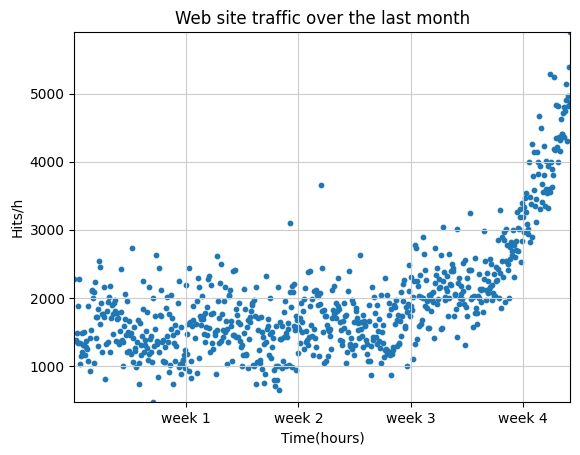

In [25]:
# plot the (x,y) points with dots of size 10
plt.scatter(x, y, s=10)
plt.title("Web site traffic over the last month")
plt.xlabel("Time(hours)")
plt.ylabel("Hits/h")
plt.xticks([w*7*24 for w in range(10)],
          [f'week {w}' for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.80')
plt.show()

### Question when will our traffic reach 50,000 hits an hour ? (We'll need a new server by then..)

## We will need to extrapolate with some model

# All models are wrong, but some models are useful

https://en.wikipedia.org/wiki/All_models_are_wrong

In [33]:
#### Error function
# f is our model here
# x is our independent variable
# y is the truth

def error(f, x, y):
    return np.sum((f(x)-y)**2)

# NumPy thus SciPy strength is vectorized functions, we do all calculations at once or near once, good for larger datasets!

## Could our data be a simple linear progression (straight line )?

In [28]:
#SciPY has polyfit function
fp1, residuals, rank, sv, rcond = np.polyfit(x, y, 1, full=True)

In [29]:
print(f"Model Parameters {fp1}")

Model Parameters [  2.59619213 989.02487106]


In [ ]:
# 1st degree f(x)= ax+b

In [ ]:
# this means f(x) = 2.59619213 * x + 989.02487106 is our linear function

In [30]:
#Error
print(residuals)

[3.17389767e+08]


In [34]:
# poly1d() to create a model function from the model parameters
f1 = np.poly1d(fp1)
err1=error(f1, x, y)
err1

np.float64(317389767.33977807)

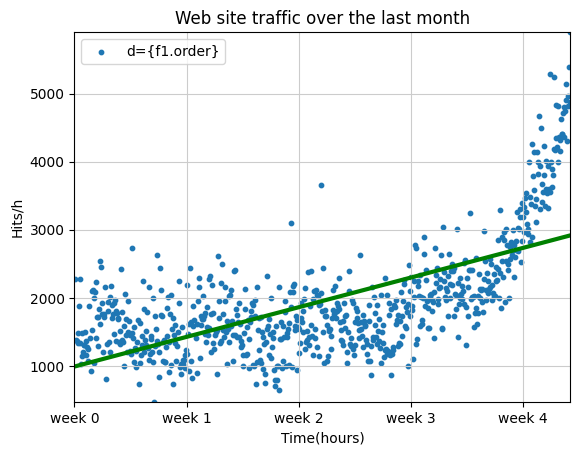

In [35]:
plt.scatter(x, y, s=10)
plt.title("Web site traffic over the last month")
plt.xlabel("Time(hours)")
plt.ylabel("Hits/h")
plt.xticks([w*7*24 for w in range(10)],
          [f'week {w}' for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.80')

fx = np.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=3, color="green")
plt.legend(["d={f1.order}"], loc="upper left")

plt.show()

### Hmm first 3-4 weeks seem OK, but then what happens? Is our model really linear?

In [ ]:
## Absolute errors not useful but good for comparing to other values
err1

317389767.339778

In [36]:
# Lets try a 2nd order function(square)
f2p = np.polyfit(x, y, 2)
f2p

array([ 1.05322215e-02, -5.26545650e+00,  1.97476082e+03])

In [ ]:
# f2(x)=ax^2 + bx + c  in our case 1.05322215e-02, -5.26545650e+00,  1.97476082e+03

In [37]:
f2 = np.poly1d(f2p) # we need a function from what we just generated
err2 = error(f2, x, y)
err2

np.float64(179983507.8781792)

In [38]:
err2**0.5

np.float64(13415.79322582825)

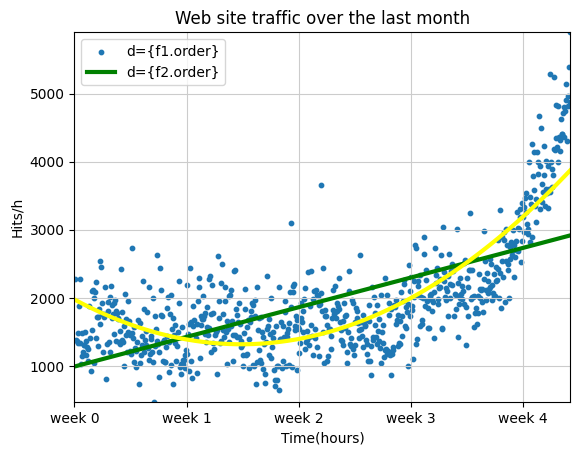

In [41]:
plt.scatter(x, y, s=10)
plt.title("Web site traffic over the last month")
plt.xlabel("Time(hours)")
plt.ylabel("Hits/h")
plt.xticks([w*7*24 for w in range(10)],
          [f'week {w}' for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.80')

fx = np.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=3, color="green")
#plt.legend(["d={f1.order}"], loc="upper left")

plt.plot(fx, f2(fx), linewidth=3, color="yellow")
plt.legend(["d={f1.order}","d={f2.order}"], loc="upper left")

plt.show()

In [61]:
colors = ['g', 'k', 'b', 'm', 'r', 'y']
linestyles = ['-', '-.', '--', ':', '-'] # look to matplotlib documentation for more styles
def plot_models(x, y, models, fname=None, mx=None, ymax=None, xmin=None, maxhours=None):
    ''' plot input data '''

    plt.figure(num=None, figsize=(10, 8))
    plt.clf()
    plt.scatter(x, y, s=10)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks(
        [w * 7 * 24 for w in range(10)], [f'week {w}' for w in range(10)])

    # legend_text = ["Ground truth -]
    plt.legend("Ground truth", loc="upper left")
    if models:
        if mx is None:
            if maxhours is None:
                mx = np.linspace(0, x[-1], 1000)
            else:
                mx = np.linspace(0, maxhours, 1000)
        for model, style, color in zip(models, linestyles, colors):
            # print "Model:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)

        plt.legend([f"d={m.order}" for m in models], loc="upper left")

    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')
    if fname != None:
        plt.savefig(fname)

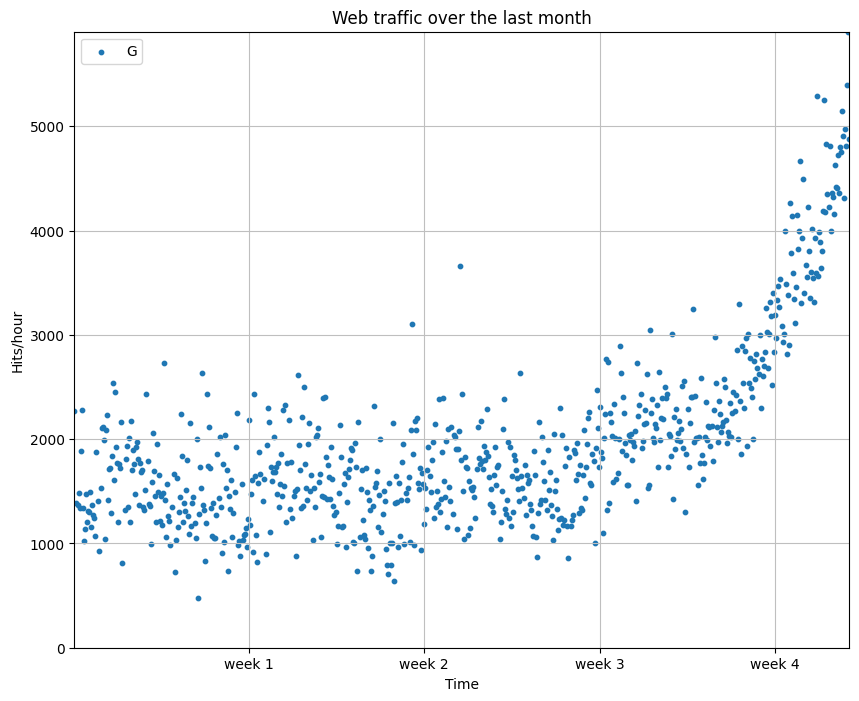

In [62]:
plot_models(x, y, None, "nomodels.png")

In [45]:
models=[f1,f2]

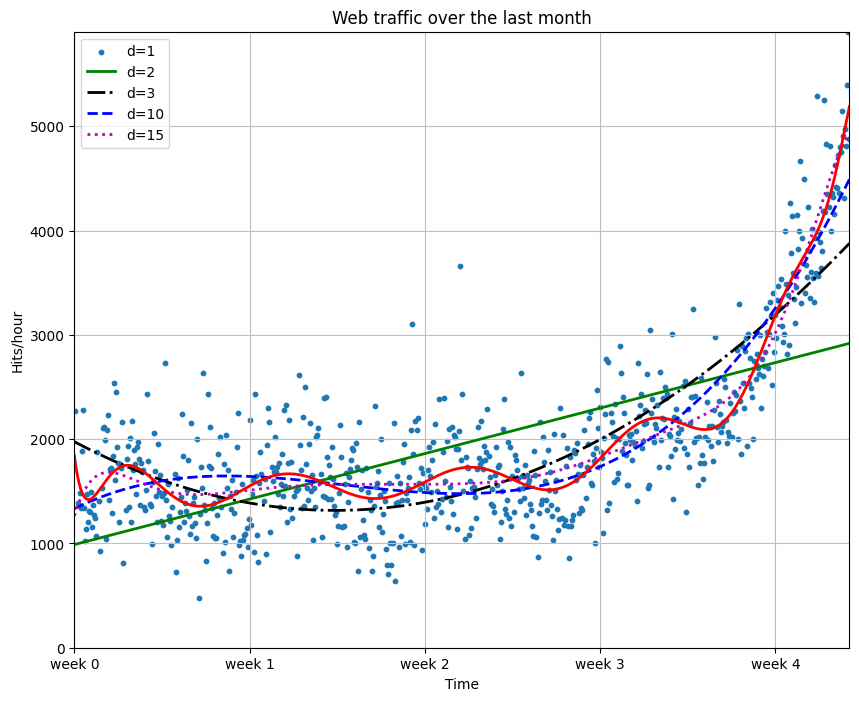

In [63]:
plot_models(x, y, models, "models.png")

In [49]:
f3 = np.poly1d(np.polyfit(x, y, 3))
f10 = np.poly1d(np.polyfit(x, y, 10))
f15 = np.poly1d(np.polyfit(x, y, 15))

In [50]:
# we add our models to our list of models
models+=[f3,f10]
models+=[f15]

In [51]:
models

[poly1d([  2.59619213, 989.02487106]),
 poly1d([ 1.05322215e-02, -5.26545650e+00,  1.97476082e+03]),
 poly1d([ 3.04960132e-05, -2.35893797e-02,  4.94226019e+00,  1.33328797e+03]),
 poly1d([-3.73981968e-22,  1.36473756e-18, -2.14294406e-15,  1.89884971e-12,
        -1.04570108e-09,  3.70867731e-07, -8.45604588e-05,  1.19167041e-02,
        -9.41618606e-01,  3.33703840e+01,  1.26421204e+03]),
 poly1d([-1.75010729e-33,  9.34970133e-30, -2.23812240e-26,  3.17325874e-23,
        -2.96996360e-20,  1.93808917e-17, -9.09469450e-15,  3.12658886e-12,
        -7.96351220e-10,  1.50887517e-07, -2.10735877e-05,  2.09371923e-03,
        -1.36560935e-01,  5.02675084e+00, -7.86093043e+01,  1.84096107e+03])]

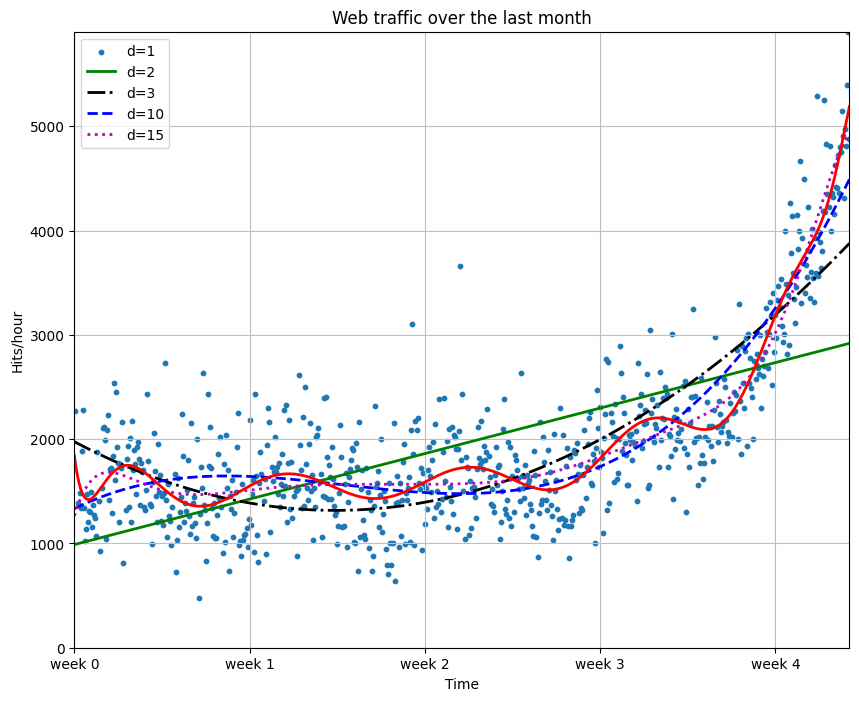

In [52]:
plot_models(x,y, models, "mod5.png")

In [64]:
for m in models:
    print(f"{m} \nError: {error(m, x, y)}\n")

 
2.596 x + 989 
Error: 317389767.33977807

         2
0.01053 x - 5.265 x + 1975 
Error: 179983507.8781792

          3           2
3.05e-05 x - 0.02359 x + 4.942 x + 1333 
Error: 139350144.03172523

           10             9             8             7             6
-3.74e-22 x  + 1.365e-18 x - 2.143e-15 x + 1.899e-12 x - 1.046e-09 x
              5             4           3          2
 + 3.709e-07 x - 8.456e-05 x + 0.01192 x - 0.9416 x + 33.37 x + 1264 
Error: 121942326.36359566

           15            14             13             12            11
-1.75e-33 x  + 9.35e-30 x  - 2.238e-26 x  + 3.173e-23 x  - 2.97e-20 x 
              10             9             8             7
 + 1.938e-17 x  - 9.095e-15 x + 3.127e-12 x - 7.964e-10 x
              6             5            4          3         2
 + 1.509e-07 x - 2.107e-05 x + 0.002094 x - 0.1366 x + 5.027 x - 78.61 x + 1841 
Error: 112482232.83165003



## Inflection point (human look)

In [66]:
inflection = int(3.5*7*24) # calculate the inflection point in hours
xa = x[:inflection] # data before the inflection point
ya = y[:inflection]
xb = x[inflection:] # data after
yb = y[inflection:]
fa = np.poly1d(np.polyfit(xa, ya, 1))
fb = np.poly1d(np.polyfit(xb, yb, 1))
fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)


In [67]:
for m in [fa,fb]:
    print(f"{m} \nError: {error(m, x, y)}\n")

 
0.8399 x + 1400 
Error: 465906112.07376736

 
21.07 x - 1.092e+04 
Error: 30035502983.248444



In [ ]:
## Trusting Error

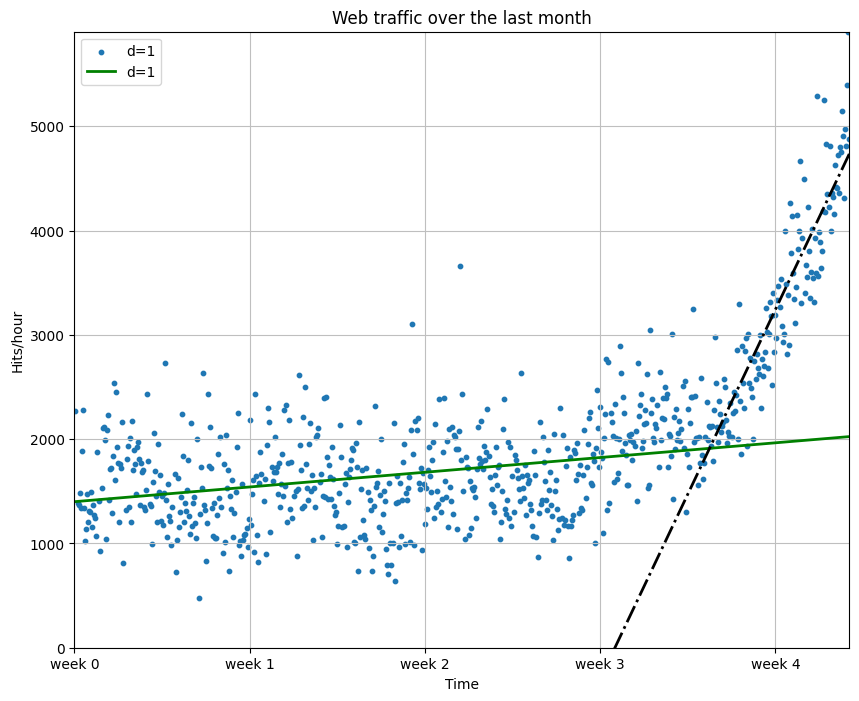

In [68]:
plot_models(x,y, [fa,fb], "modab.png")

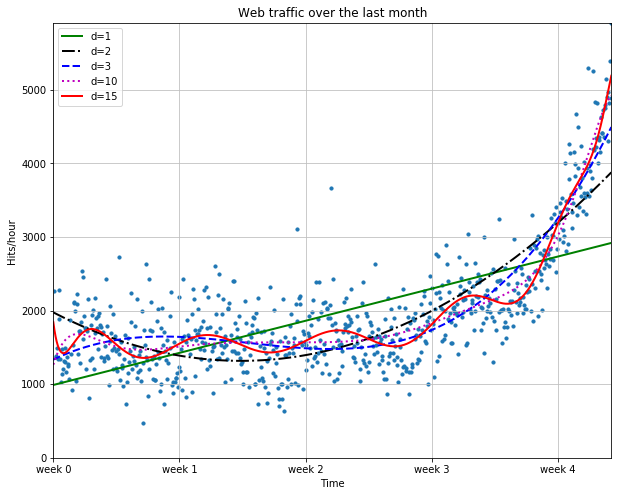

In [ ]:
plot_models(x,y, models)

In [ ]:
mx = sp.linspace(0, 1200, 1000)

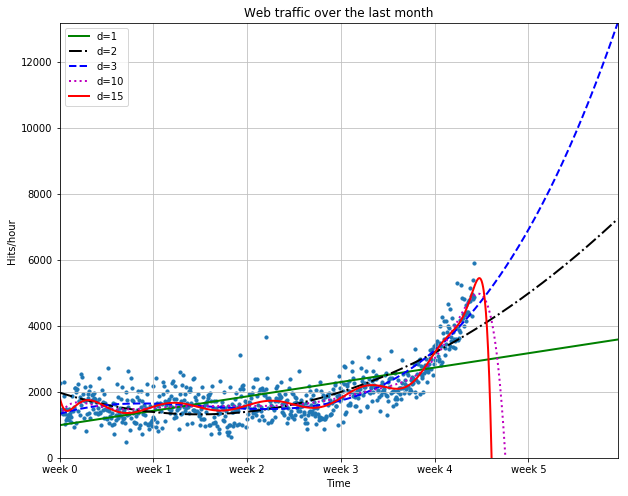

In [ ]:
plot_models(x,y, models, maxhours=1000)

# Bad case of overfitting!! on d10 and d15

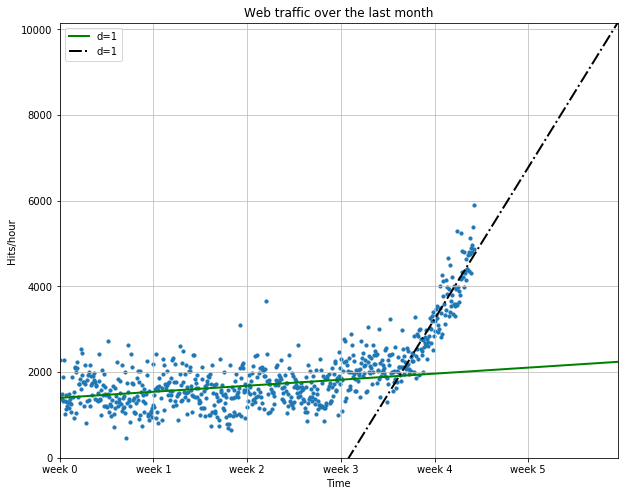

In [ ]:
plot_models(x,y, [fa,fb], maxhours=1000)

In [ ]:
# Solving equations

In [ ]:
from scipy.optimize import fsolve
print(fb)
print(fb - 500000)
reached_max = fsolve(fb - 50000, x0=800) / (7 * 24) # x0 is the starting estimate for speedup
print(f"50,000 hits/hour expected in week {reached_max[0]}")

 
21.07 x - 1.092e+04
 
21.07 x - 5.109e+05
50,000 hits/hour expected in week 17.207845638622228


In [ ]:
reached_max

array([17.20784564])

In [ ]:
# Solve documentation https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.fsolve.html